<a href="https://colab.research.google.com/github/kauefs/COVID/blob/%40/notebooks/COVID19BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align=center><a href=https://sigmoidal.ai/><img alt=SigMoidal src=https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png width=15%>
<br>
<img src=https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/eds.png width=20%><a/></p>

---
# The case of COVID**-**19 in Brazil

[![GitHub](https://img.shields.io/badge/GitHub-000000?logo=github&logoColor=white)](https://github.com/kauefs/)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?logo=linkedin&logoColor=white)](https://www.linkedin.com/in/kauefs/)
[![Python](https://img.shields.io/badge/Python-3-blue.svg)](https://www.python.org/)
[![License](https://img.shields.io/badge/License-Apache2-black.svg)](https://www.apache.org/licenses/LICENSE-2.0)

$$23\ November\ 2023$$

Brazil is the fifth largest country in the world and the seventh in population with over 200 million inhabitants. When the COVID**-**19 outbreak begun on the eve of 2020; and even though the first case in the country had been registered at the end of February, with the first death coming the following month, fifteen days later, the country had been relatively **'**safe**'** during the first semester of 2020. Signs of how it was going to deal with the outbreak though were less hopeful. A month into **'**lockdown**'** the then Minister of Health, a physician, was fired by the then President because the Minister was trying to keep the population safe from the pandemic, following the World Health Organization **(**WHO**)** directives. The then President, however, was against it, saying it would damage the economy. From there on the then President became the _de facto_ Minister of Health, instating new ministers that would only **'**follow orders**'**, diminishing the disease and discrediting vaccines.

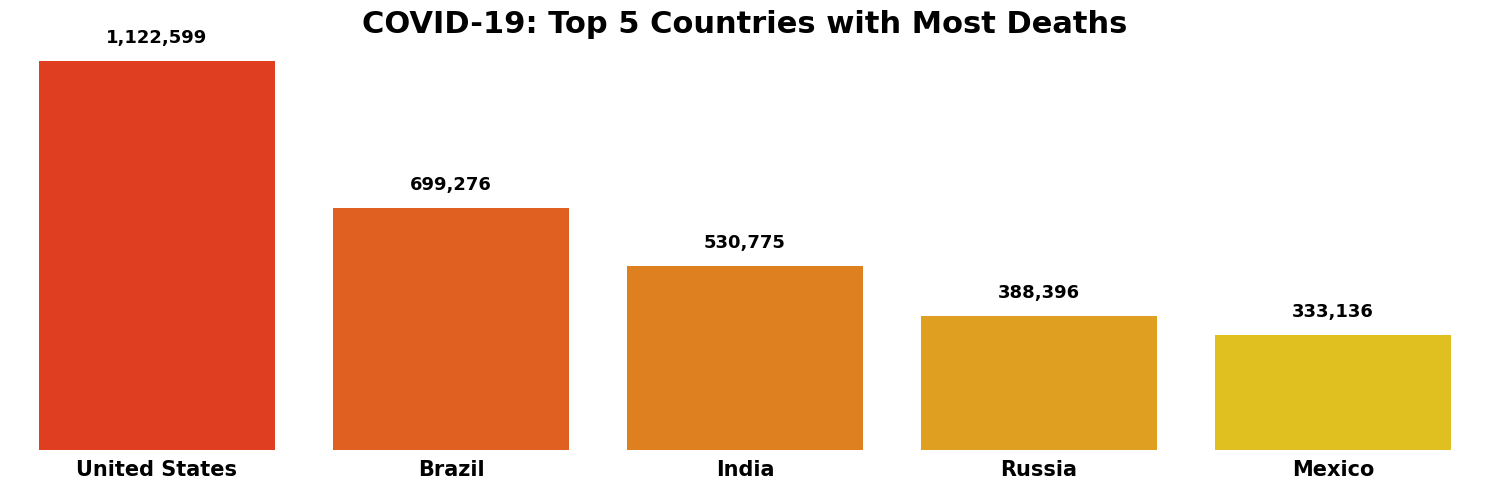

In [ ]:
# @title Chart 1: Top 5 Countries with most Deaths
# Libraries:
import numpy               as np
import pandas              as pd
import matplotlib.pyplot   as plt
import matplotlib.gridspec as gs
import matplotlib.ticker   as ticker
import matplotlib.dates    as mdates
import seaborn             as sns
# Display Configuration:
sns.set_style()
pd.set_option('display.max.columns', None)
# OWID DataSet:
OWID       = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data-old.csv', parse_dates=['date'])
# Setting Index:
OWID.set_index('date', inplace = True)
# Sorting Index Chronologically:
OWID.sort_index(inplace=True)
# Selecting Columns:
OWID1 = OWID [['location',
               'total_cases',
               'total_deaths',
               'new_cases_smoothed',
               'new_deaths_smoothed',
               'new_vaccinations_smoothed']].copy()
# Filling Missing Values:
OWID2       = OWID1.copy()
num         = OWID2.select_dtypes(include=['number']).columns
OWID2[num]  = OWID2[num].fillna(0)
nan         = OWID2.select_dtypes(exclude=['number']).columns
OWID2[nan]  = OWID2[nan].fillna('N/A')
# Top 5 Countries with most Deaths:
top_deaths = (OWID2.loc[(OWID2.index[-1]),
                        ['location', 'total_deaths']].sort_values(by='total_deaths',
                                                        ascending=False).iloc[9:14])
fig,ax = plt.subplots(figsize=(15,5), tight_layout=True)
sns.barplot(x='location',  y= 'total_deaths', data=top_deaths, ax=ax, palette='autumn', saturation=.75)
ax.set_title('COVID-19: Top 5 Countries with Most Deaths', fontsize=22, fontweight='bold')
for spine in ['top', 'right', 'left', 'bottom']:ax.spines[spine].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(True)
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(15)
plt.tick_params(axis  = 'both',
                which = 'both',
                bottom=  False)
values=  top_deaths.value_counts(ascending=False).iloc[9:14].values
ax.bar_label(container=ax.containers[0], labels=values, fmt='{:,.0f}',
              fontsize=13,  padding=10 , fontweight='bold')
ax.set(xlabel=None)
plt.savefig('CovidTop5.png')
plt.show()

The consequences could not have been more sinister. Brazil has become the country with the second highest death toll, only behind the United States. A death toll rate that was almost twice the worldwide rate of 1**%** of deaths from registered cases.

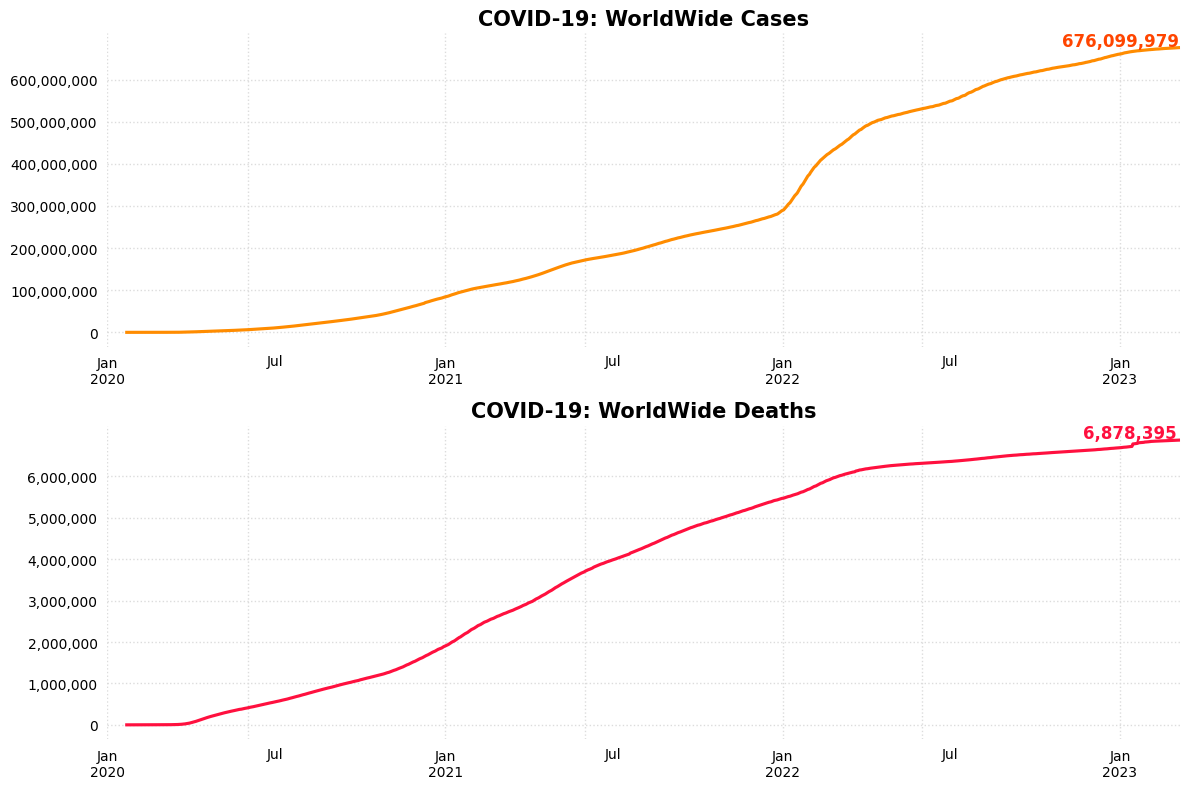

In [ ]:
# @title Chart 2: Line Evolution for COVID-19 WorldWide (Cases & Deaths)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8), tight_layout=True)
OWID2.loc[OWID2.location =='World', 'total_cases'].sort_values(ascending=False).plot(
                kind       ='line'   ,
                ax         = ax1     ,
                marker     ='o'      ,
                linestyle  ='solid'  ,
                color      ='#FF8C00',
                linewidth  ='2.25'   ,
                ms=.01, mec='#FF8C00',    mfc='#FF8C00')
ax1.annotate('{:,.0f}'.format(OWID2['total_cases'].sort_values(ascending=False)[0]),
                xy=(1, OWID2['total_cases'].sort_values(ascending=False)[0]),
                xycoords=('axes fraction', 'data'),
                xytext=(-85,1.15),
                textcoords='offset points',
                color='#FF4500',
                fontsize=12,
                fontweight='semibold')
ax1.set_title('COVID-19: WorldWide Cases', fontsize=15, fontweight='bold')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid(linestyle=':', linewidth=1, color='#DCDCDC', mouseover=True)
ax1.tick_params(axis  ='both',
                which ='both',
                left  = False,
                bottom= False)
ax1.set_yticks([0, 100000000, 200000000, 300000000, 400000000,  500000000,  600000000], minor=False)
ax1.set_xticks(['2020-01','2020-06','2021-01','2021-06','2022-01','2022-06','2023-01'], minor=False)
ax1.set(xlabel=None)
ax1.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
OWID2.loc[OWID2.location =='World', 'total_deaths'].sort_values(ascending=False).plot(
                kind       ='line'   ,
                ax         = ax2     ,
                marker     ='o'      ,
                linestyle  ='solid'  ,
                color      ='#FF103F',
                linewidth  ='2.25'   ,
                ms=.01, mec='#FF103F',     mfc='#FF103F')
ax2.annotate('{:,.0f}'.format(OWID2['total_deaths'].sort_values(ascending=False)[0]),
                xy=(1, OWID2['total_deaths'].sort_values(ascending=False)[0]),
                xycoords=('axes fraction', 'data'),
                xytext=(-70,1.15),
                textcoords='offset points',
                color='#FF103F',
                fontsize=12,
                fontweight='semibold')
ax2.set_title('COVID-19: WorldWide Deaths', fontsize=15, fontweight='bold')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.grid(linestyle=':',  linewidth=1, color='#DCDCDC')
ax2.tick_params(axis  ='both',
                which ='both',
                left  = False,
                bottom= False)
ax2.set_yticks([0,1000000, 2000000 , 3000000 , 4000000 , 5000000 , 6000000],            minor=False)
ax2.set_xticks(['2020-01','2020-06','2021-01','2021-06','2022-01','2022-06','2023-01'], minor=False)
ax2.set(xlabel=None)
ax2.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.rcParams['font.family']='sans-serif'
plt.savefig( 'CovidTotal.png')
plt.show()

The world has lost a population about the size the one that lives in the metropolitan area of Rio de Janeiro. About 10**%** of those deaths happened in Brazil**!**

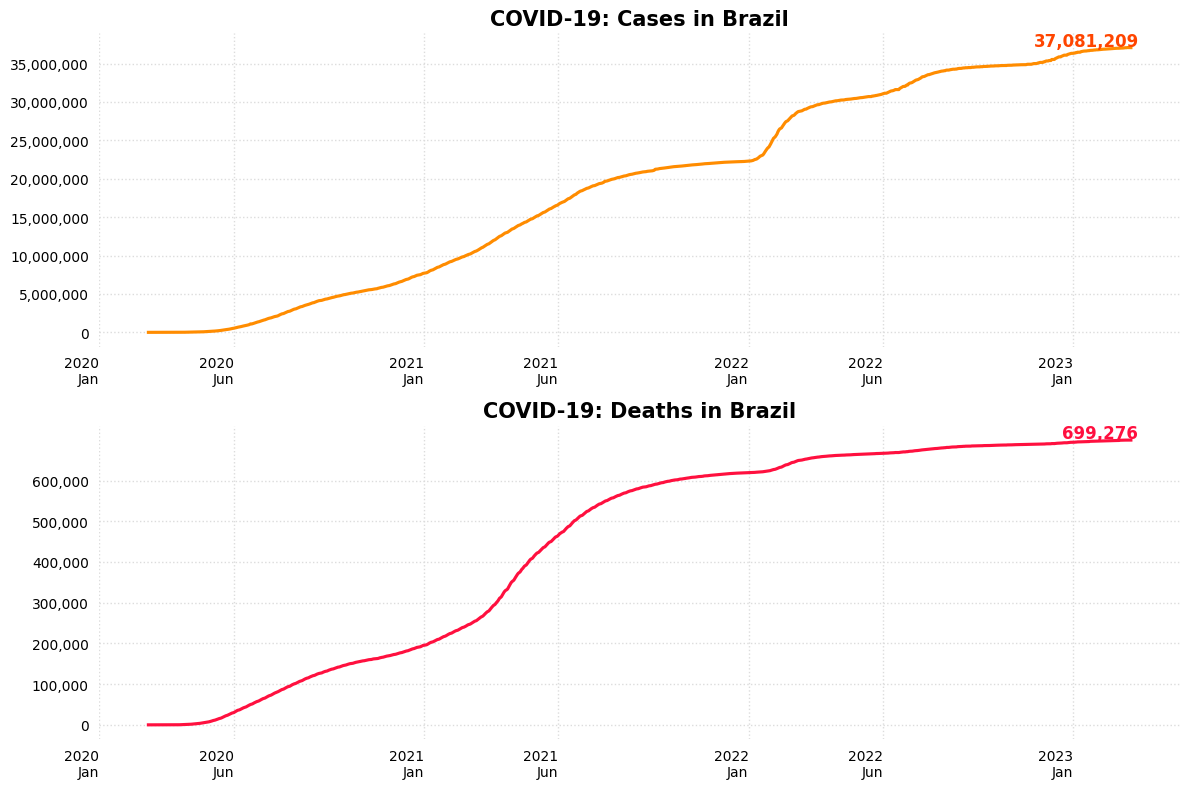

In [ ]:
# @title Chart 3: Linear Evolution for COVID-19 in Brazil (Cases & Deaths)
BR = OWID2.loc[OWID2.location == 'Brazil'].copy()
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8), tight_layout=True)
BR['total_cases'].sort_values(ascending=False).plot(
                kind       ='line'   ,
                ax         = ax1     ,
                marker     ='o'      ,
                linestyle  ='solid'  ,
                color      ='#FF8C00',
                linewidth  ='2.25'   ,
                ms=.01, mec='#FF8C00',    mfc='#FF8C00')
ax1.annotate('{:,.0f}'.format(BR['total_cases'].sort_values(ascending=False)[0]),
                xy=(1, BR['total_cases'].sort_values(ascending=False)[0]),
                xycoords=('axes fraction', 'data'),
                xytext=(-105,1.15),
                textcoords='offset points',
                color='#FF4500',
                fontsize=12,
                fontweight='semibold')
ax1.set_title('COVID-19: Cases in Brazil', fontsize=15, fontweight='bold')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid(linestyle=':',  linewidth=1, color='#DCDCDC')
ax1.tick_params(axis  ='both',
                which ='both',
                left  = False,
                bottom= False)
ax1.set_yticks([0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000, 35000000], minor=False)
ax1.set_xticks(['2020-01' ,'2020-06','2021-01','2021-06','2022-01','2022-06','2023-01'], minor=False)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y\n%b'))
ax1.xaxis.set_tick_params(rotation=0)
ax1.set(xlabel=None)
ax1.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
BR['total_deaths'].sort_values(ascending=False).plot(
                kind       ='line'   ,
                ax         = ax2     ,
                marker     ='o'      ,
                linestyle  ='solid'  ,
                color      ='#FF103F',
                linewidth  ='2.25'   ,
                ms=.01, mec='#FF103F',     mfc='#FF103F')
ax2.annotate('{:,.0f}'.format(BR['total_deaths'].sort_values(ascending=False)[0]),
                xy=(1, BR['total_deaths'].sort_values(ascending=False)[0]),
                xycoords=('axes fraction', 'data'),
                xytext=(-85,1.15),
                textcoords='offset points',
                color='#FF103F',
                fontsize=12,
                fontweight='semibold')
ax2.set_title('COVID-19: Deaths in Brazil', fontsize=15, fontweight='bold')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.grid(linestyle=':', linewidth=1, color='#DCDCDC')
ax2.tick_params(axis  ='both',
                which ='both',
                left  = False,
                bottom= False)
ax2.set_yticks([0,100000 , 200000  , 300000  , 400000  , 500000  , 600000 ],            minor=False)
ax2.set_xticks(['2020-01','2020-06','2021-01','2021-06','2022-01','2022-06','2023-01'], minor=False)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y\n%b'))
ax2.xaxis.set_tick_params(rotation=360)
ax2.set(xlabel=None)
ax2.spines[[ 'top','right',  'left', 'bottom']].set_visible(False)
plt.rcParams['font.family'] ='sans-serif'
plt.savefig(  'CovidBrazil.png')
plt.show()

Brazil has always had a history of vaccinations with a National Program of Immunization efficient and effective, famous for the eradication of polio for which the vaccination campain _Zé Gotinha_ **('**Droplet Joe**')** mascot was created in 1986 and became a symbol in saving lives.

<p align=center><img alt='Droplet Joe' src=https://www.gov.br/saude/pt-br/campanhas-da-saude/2023/vacinacao/ze-gotinha/ze-gotinha/@@govbr.institucional.banner/f0ed8b09-fbd2-47b6-b441-d54c6fa4a87b/@@images/201a5721-4a35-4010-a373-c3e89f3399b2.gif></p>

The following chart makes it cristal clear how the vaccines were very effective in fighting the disease, so much so the world has pretty much outcome it and life has basically resumed to what it used to be in many ways with no more lockdowns or masks.

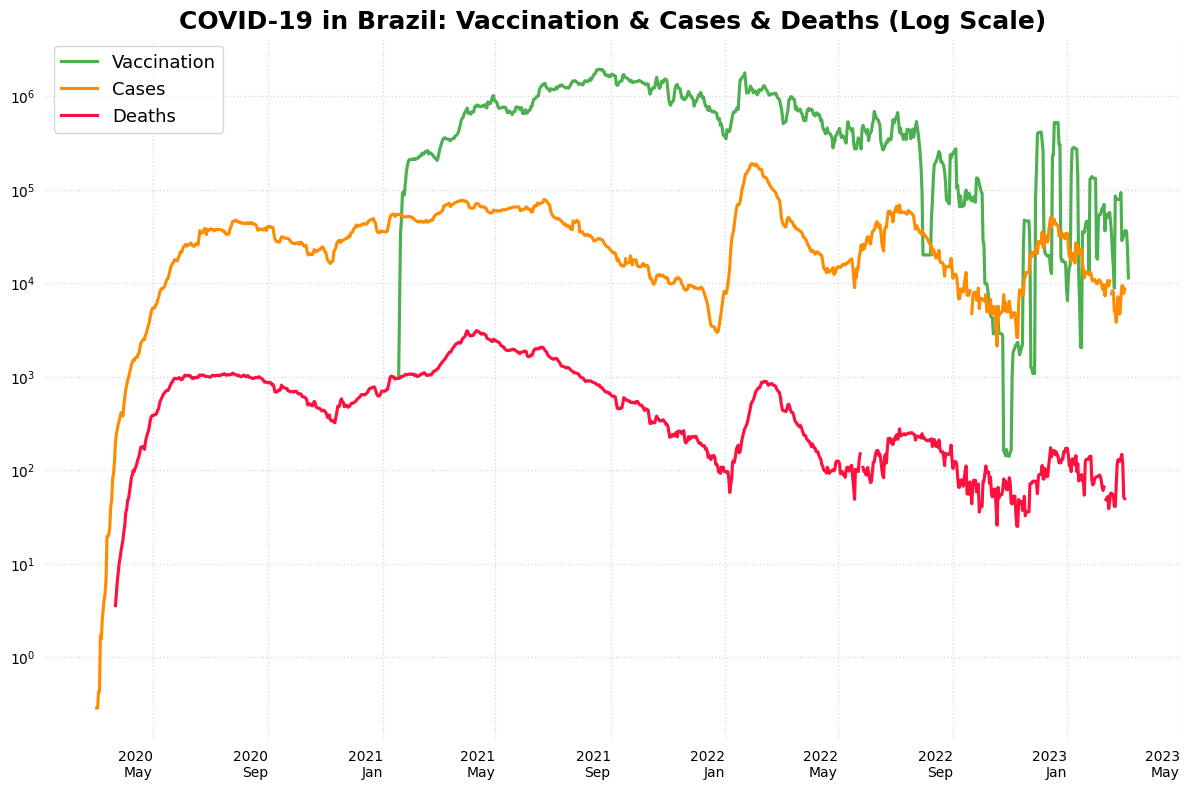

In [ ]:
# @title Chart 4: Logarithmic Evolution for COVID-19 in Brazil (Vaccination & Cases & Deaths)
fig , ax = plt.subplots(figsize=(12,8), tight_layout=True)
# df.loc[df.location == 'Brazil', 'positive_rate'].sort_values(ascending=False).plot(
OWID.loc[OWID.location == 'Brazil','new_vaccinations_smoothed'].sort_values(ascending=False).plot(
                kind       ='line'   ,
                label      ='Vaccination',
                ax         = ax      ,
                marker     ='o'      ,
                linestyle  ='solid'  ,
                color      ='#4CAF50',
                linewidth  ='2.25'   ,
                ms=.01, mec='#4CAF50',mfc='#4CAF50')
OWID.loc[OWID.location == 'Brazil','new_cases_smoothed'].sort_values(ascending=False).plot(
                kind       ='line'   ,
                label      ='Cases'  ,
                ax         = ax      ,
                marker     ='o'      ,
                linestyle  ='solid'  ,
                color      ='#FF8C00',
                linewidth  ='2.25'   ,
                ms=.01, mec='#FF8C00', mfc='#FF8C00')
OWID.loc[OWID.location == 'Brazil','new_deaths_smoothed'].sort_values(ascending=False).plot(
                kind       ='line'   ,
                label      ='Deaths' ,
                ax         = ax      ,
                marker     ='o'      ,
                linestyle  ='solid'  ,
                color      ='#FF103F',
                linewidth  ='2.25'   ,
                ms=.01, mec='#FF103F',   mfc='#FF103F')
ax.set_title('COVID-19 in Brazil: Vaccination & Cases & Deaths (Log Scale)', fontsize=18, fontweight='bold')
ax.grid(linestyle=':' , linewidth=1  , color='#DCDCDC')
ax.tick_params(axis   ='both',
                which ='both',
                left  = False,
                bottom= False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y\n%b'))
ax.xaxis.set_tick_params(rotation=0)
ax.set(xlabel=None)
ax.spines[['top',  'right', 'left', 'bottom']].set_visible(False)
ax.legend(loc='best', fontsize=13)
plt.rcParams[ 'font.family']=    'sans-serif'
plt.yscale(   'log')
plt.savefig(  'CovidBR.png')
plt.show()

Nonetheless, has any lesson been learned at all**?** Is the world better equipped to deal with another pandemic**?** It was fortunate a vaccine so effective could have been produced somewhat so quickly; lucky may not be around another time.

---
## Data

Source**:** [Our World in Data](https://covid.ourworldindata.org/data/owid-covid-data-old.csv) Johns Hopkins University daily reports from 2020**.**01**.**01 to 2023**.**03**.**07.

### Reference

* [Data Cleaning Techniques in Python**:** the Ultimate Guide](https://www.justintodata.com/data-cleaning-techniques-python-guide/)